# BlueSky Post Cleaning
---
Author: Natalie Castro
Affiliation: University of Colorado at Boulder


The purpose of this notebook is to clean the data collected from BlueSky firehose API.


## 1. Environment Creation

### 1.1 Library Import

In [1]:
''' FILE ACCESS '''

import json
import os
import glob
import smart_open
import csv

''' DATA QUERYING '''

import regex as re
import pandas as pd
import datetime
from datetime import datetime
import string
punctuation_list = list(string.punctuation)

''' TOPIC MODELING '''
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

''' DATA VISUALIZATION '''

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

### 1.2 Data Import

#### 1.2.1 International Labor Day: May 1st 2025

In [8]:
## Establishing a file path and then reading all of the files
data_filepath = (glob.glob(r'C:\Users\natal\OneDrive\university\research\labor day\*.jsonl'))

In [9]:
data_paths = []

for filepath in data_filepath:
    data_paths.append(filepath)

In [10]:
def file_opener(filepath):
    string_path = str(filepath)
    with open(string_path, 'r', encoding='utf-8') as file:
        data = [json.loads(line) for line in file]
        
    posts = pd.DataFrame(data)
    
    return (posts)

In [11]:
data = []
for path in data_paths:
    current_data = file_opener(path)
    
    data.append(current_data)

In [12]:
posts = pd.concat(data)

In [13]:
posts.drop_duplicates(subset = ['text', 'created_at', 'author'], inplace=True)

In [14]:
posts.reset_index(inplace=True, drop = True)

In [16]:
print (f"The total posts collected are {len(posts)}")

The total posts collected are 3021676


In [ ]:
posts.to_csv("Cleaned BlueSky Posts.csv", escapechar='{')

In [2]:
posts = pd.read_csv("Cleaned BlueSky Posts.csv", escapechar = '{')

### 1.3 Function Definition

In [6]:
def climate_finder(current_post):
    climate_pattern = "(climate)|(global warming)|(carbon)|(sustainability)|(biodiversity)|(pollution)|(deforestation)|(renewable)|(extinction)|(mitigration)|(sea-level)|(fossil)|(termperature)|(sustainable future)|(greenhouse gases)|(save the planet)|(ecofriendly)|(reduce, reuse, recycle)|(green revolution)|(protect our planet)|(zero waste)|(future generations)|(SDG)|(going green)|(planet over profit)|(workers day)|(international workers day)|(workers rights)|(climate change)|(labor policy)|(climate policy)|(labor decisions)|(climate decisions)|(worker policy)|(climate regulation)|(labor regulation)|(employee protections)|(worker protections)|(labor rights)|(workplace regulations)|(union policy)|(collective bargaining)|(employment policy)|(wage policy)|(worker advocacy)|(labor reform)|(fair labor standards)|(job security regulations)|(employment equity)|(labor law changes)|(workforce decisions)|(environmental justice)|(climate justice)|(emissions policy)|(greenhouse gas regulation)|(carbon policy)|(energy policy)|(renewable energy policy)|(climate adaptation strategy)|(environmental protection policy)|(sustainable development regulation)|(green energy legislation)|(decarbonization plan)|(climate action framework)|(ecological regulation)|(environmental governance)|(green jobs policy)|(sustainable labor practices)|(just transition policy)|(climate-labor integration)|(environmentally sustainable labor laws)|(eco friendly workplace regulations)|(climate resilient employment policy)|(worker benefits)|(occupational safety)|(workplace safety standards)|(union organizing)|(employment protections)|(worker safety policy)|(wage equity)|(gig worker protections)|(blue collar labor policy)|(industrial relations)|(labor market regulation)|(employment law)|(minimum wage policy)|(employment standards)|(labor code enforcement)|(worker support services)|(rights of essential workers)"
    current_post = current_post.lower()
    current_post = re.sub(r'[^a-zA-Z\d\s]','',current_post)
    post_matches = re.findall(climate_pattern,current_post)
    
    if len(post_matches) != 0:
        return(True)
    
    else:
        return (False)
    

In [7]:
def frame_filter(dataframe):
    
    climate_mask = []

    for post in range(0,len(dataframe)):
        current_post = dataframe.at[post,'text']

        match_result = climate_finder(current_post)
        climate_mask.append(match_result)
        
    climate_posts = dataframe[climate_mask].copy()
    climate_posts.reset_index(inplace=True)
    climate_posts.drop(columns=['index'],inplace=True)
    
    return(climate_posts)

In [8]:
def number_remover(text):
    new_text = re.sub("\d","",text)
    clean_text = re.sub("[.,?!#$%]","",new_text)
    return (clean_text)

In [9]:
''' CONVERTING CREATED AT TIME TO TIMESTAMP'''
def time_converter(timestamp):
    dt = parse(timestamp)
    formatted_date_time = dt.strftime('%Y-%m-%d %H:%M')
    return (formatted_date_time)

### 1.4 Post Cleaning

In [2]:
posts = pd.read_csv("Cleaned BlueSky Posts.csv",escapechar='{')

In [10]:
posts.dropna(subset='text',inplace=True)

In [11]:
''' REMOVING NUMBERS '''
posts['clean text'] = posts['text'].apply(lambda x: number_remover(x))


### 2. Exploratory Data Analysis

In [13]:
print (f"The total text posts collected on International Workers Day were: {len(posts)}")

The total text posts collected on International Workers Day were: 2897346



## 2.1 By Word Filtering

In [13]:
posts.reset_index(inplace=True)

In [14]:
sample_posts = frame_filter(posts)

In [15]:
print (f"The total posts collected on May 1st that maybe about climate and labor rights are : {len(sample_posts)}")

The total posts collected on May 1st that maybe about climate and labor rights are : 9697


#### 2.1.2 Additional Post Cleaning

In [69]:
    ## Removing any illegal characters 
sample_posts['clean text'] = sample_posts['text'].str.replace(r'[^\x00-\x7F]+', '', regex=True)  # Remove non-ASCII characters
sample_posts['clean text'] = sample_posts['clean text'].str.encode('utf-8', 'ignore').str.decode('utf-8')
sample_posts['clean text'] = sample_posts['clean text'].apply(lambda x: number_remover(x))
sample_posts['clean text'] = sample_posts['clean text'].apply(lambda x: re.sub("\\n"," ",x))
sample_posts['clean text'] = sample_posts['clean text'].apply(lambda x: re.sub("\\r"," ",x))

html_pattern = r'http.+(?=\s*?)'
www_pattern = r'www.+(?=\s*?)'
sample_posts['clean text'] = sample_posts['clean text'].apply(lambda x: re.sub(html_pattern," ",x))
sample_posts['clean text'] = sample_posts['clean text'].apply(lambda x: re.sub(www_pattern, " ", x))

In [26]:
sample_posts.reset_index(inplace=True, drop=True)

In [70]:
sample_posts.to_csv("Climate and Workers Posts Posts - May 1st.csv")

## 3. Visualizations

In [20]:
''' SOURCE: GEEKS FOR GEEKS GENERATING WORD CLOUD PYTHON '''

comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in sample_posts.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "



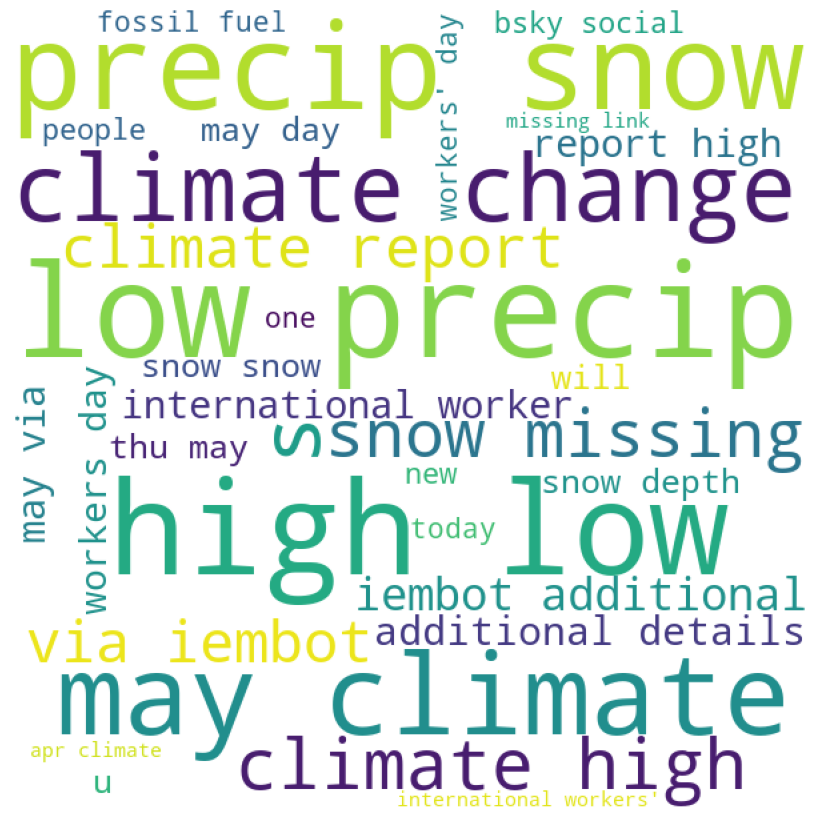

In [22]:
wordcloud = WordCloud(width = 600, height = 600,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 15).generate(comment_words)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 

plt.savefig('Sample Posts Word Cloud.png',dpi=500, )
plt.show()

## 4. Generating Basket Data for Association Rule Mining

In [ ]:
sample_posts = pd.read_csv("Climate and Workers Posts Posts - May 1st.csv")


In [6]:
post_basket = sample_posts[['clean text']].copy()
post_basket =  post_basket.to_dict(orient='records')


In [14]:
def transaction_creator(index, basket):
    text = basket[index]['clean text']  # this is likely a string
    cleaned_text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    
    words = cleaned_text.split()  # simple tokenization — adjust if you need more advanced handling
    # Remove stopwords
    items = [word.lower() for word in words if word not in STOPWORDS]
    items = [word.lower() for word in items if word not in punctuation_list]

    ## Lowering
    return items


In [15]:
transactions = []

for index in tqdm(range(0,len(post_basket)),desc='🛒🐛... | inching through the store'):
    transactions.append(transaction_creator(index,post_basket))

🛒🐛... | inching through the store:   0%|          | 0/9697 [00:00<?, ?it/s]

In [9]:
print (len(transactions))

9697


In [16]:
''' WRITING TO A CSV '''

with open('Sample Post Basket Data.csv', 'w', newline='\n') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(transactions)